In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd

# Open the data and assign it to df
parser = Sbopen()
df = parser.match(competition_id=11, season_id=90)

team = "Barcelona"

# Get list of games by our team, either home or away
match_ids = df.loc[(df["home_team_name"] == team) | (df["away_team_name"] == team)]["match_id"].tolist()

# Calculate number of games
no_games = len(match_ids)

In [2]:
# Declare an empty DataFrame
total_passes = pd.DataFrame()

# Iterate over match_ids
for idx in match_ids:
    # Open the event data from this game
    df_match = parser.event(idx)[0]
    for period in [1, 2]:
        # Keep only accurate passes by Messi that were not set pieces in this period
        mask_pass = (df_match.player_id == 5503) & (df_match.type_name == "Pass") & (df_match.outcome_name.isnull()) & (df_match.period == period) & (df_match.sub_type_name.isnull())
        # Keep only necessary columns
        passes = df_match.loc[mask_pass, ["x", "y", "end_x", "end_y", "player_id"]]
        # Concatenate passes with total_passes DataFrame
        total_passes = pd.concat([total_passes, passes], ignore_index=True)

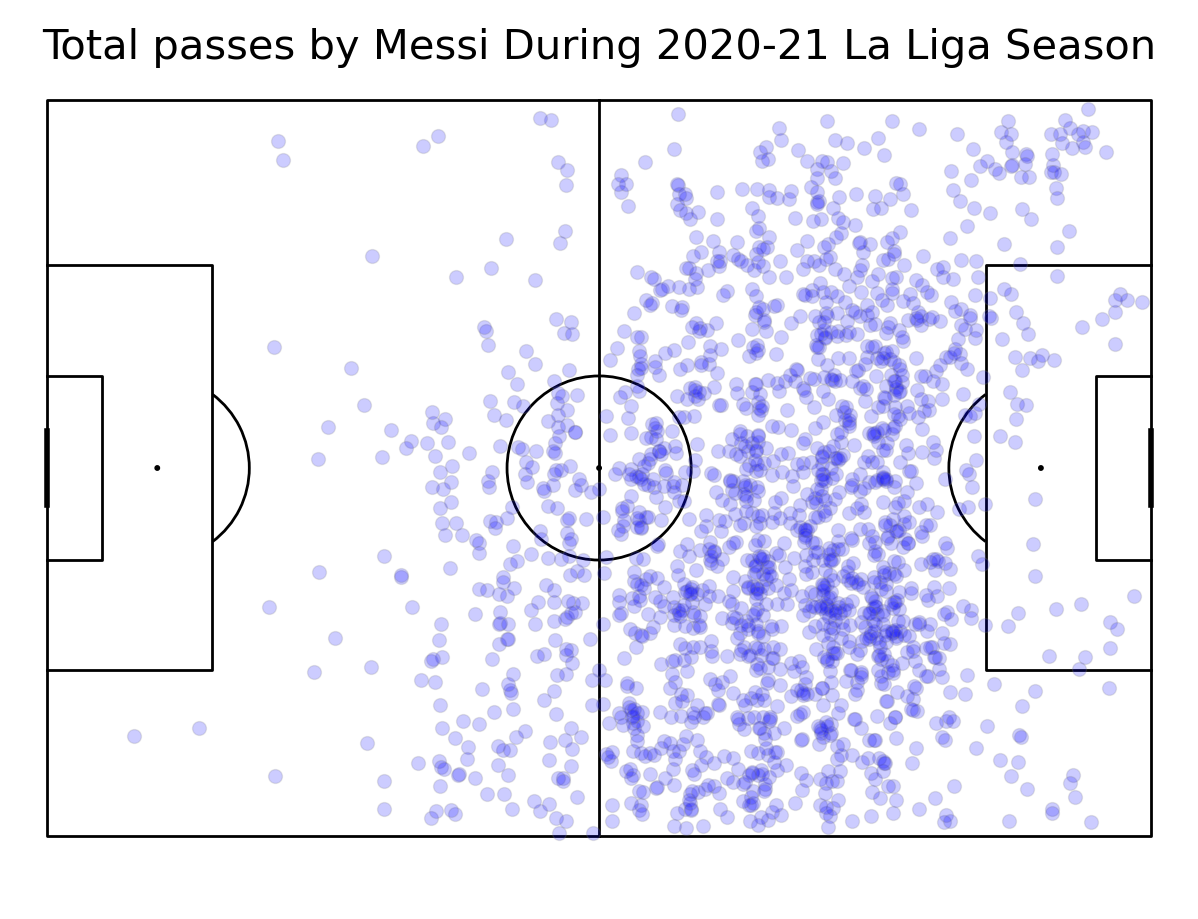

In [5]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Create a soccer pitch
pitch = Pitch(line_color='black')

# Create the figure and axes
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Scatter the location of danger passes on the pitch
pitch.scatter(total_passes.x, total_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])

# Uncomment the line below to plot arrows for the passes
# pitch.arrows(danger_passes.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color="blue", ax=ax['pitch'])

# Add a title
fig.suptitle('Total passes by Messi During 2020-21 La Liga Season', fontsize=30)

# Show the plot
plt.show()


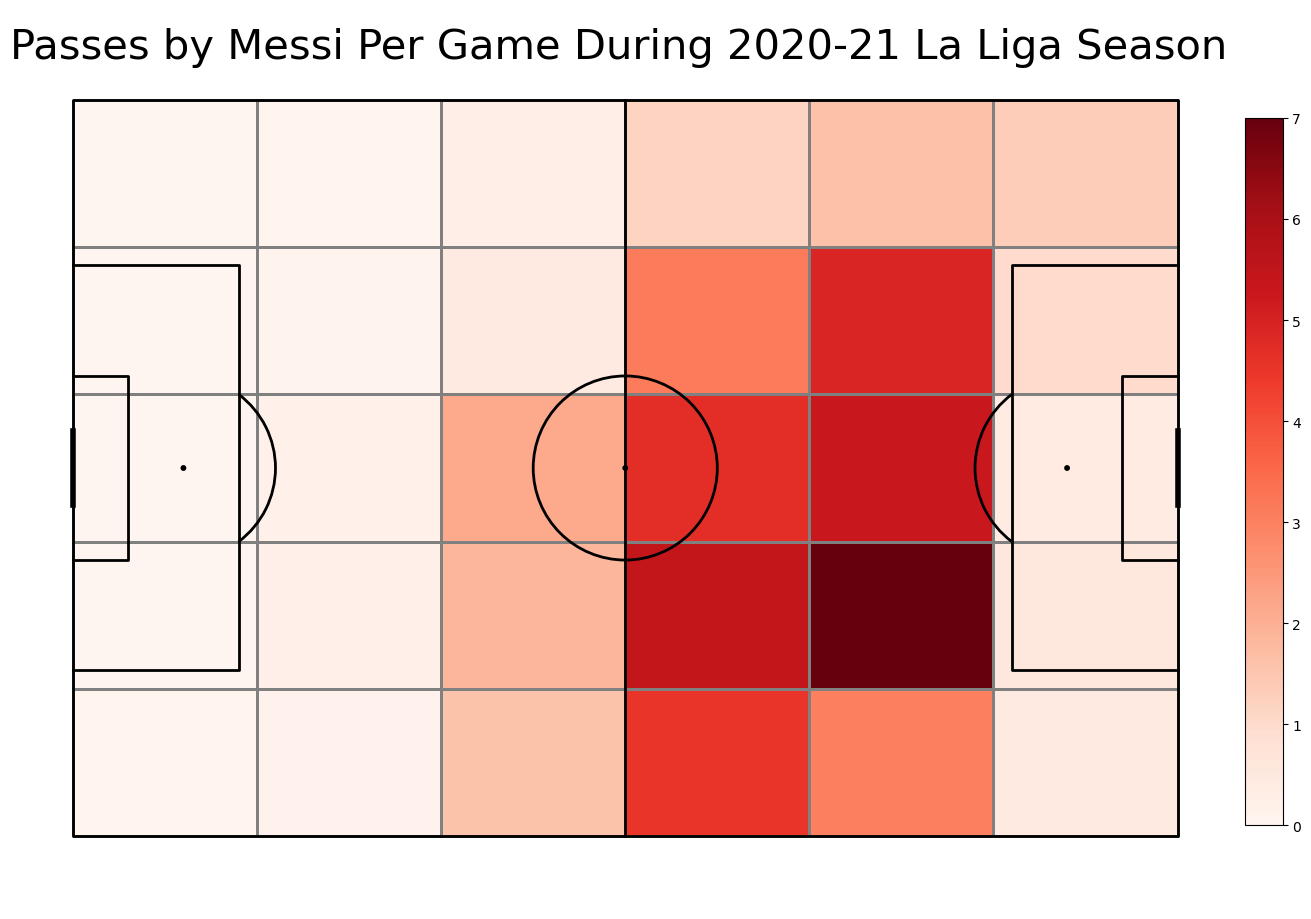

In [4]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram
bin_statistic = pitch.bin_statistic(total_passes.x, total_passes.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Passes by Messi' + " Per Game During 2020-21 La Liga Season ", fontsize = 30)
plt.show()

In [5]:
df.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [16]:
print(match_ids)

[3773457, 3773631, 3773665, 3773497, 3773660, 3773593, 3773466, 3773585, 3773552, 3773672, 3773386, 3773565, 3773587, 3773656, 3773377, 3773586, 3773372, 3773387, 3773695, 3773369, 3773661, 3773597, 3773523, 3773571, 3773428, 3764661, 3773526, 3773474, 3773625, 3773403, 3773547, 3773415, 3764440, 3773689, 3773477]


In [17]:
print(no_games)

35
